<h1>딥러닝 기초</h1>

In [1]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# 데이터셋
from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True)
# numpy 형태로 y를 배열
y = np.array([ 0 if y_numeric[i]<140 else 1 for i in range(len(y_numeric)) ])
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

# Scikit-learn을 이용한 인공신경망

In [3]:
from sklearn.neural_network import MLPClassifier
f = MLPClassifier(
        hidden_layer_sizes = (10,5),
        activation = 'logistic',
        solver = 'lbfgs', # for small data set, sgd/adam for large data set
        alpha = 0.01, # L2 regularization
        batch_size = 'auto',
        learning_rate = 'constant',
        learning_rate_init = 0.001,
        random_state = 0,
        max_iter = 10000)

In [4]:
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

1.0 0.7062146892655368


# Tensorflow를 이용한 인공신경망

In [5]:
# 텐서플로우 라이브러리
import tensorflow as tf

신경망 모델의 선언

In [6]:

# 인공신경망 모델
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Input(shape=(10,)) )     # 입력 변수의 수 10
model.add( tf.keras.layers.Dense(10,activation='sigmoid') )
model.add( tf.keras.layers.Dense(5,activation='sigmoid') )
model.add( tf.keras.layers.Dense(2,activation='softmax'))

In [7]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

모델 훈련

In [8]:
model.fit(xtrain,ytrain,epochs=5) # 최초 ５번

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.4945 - loss: 0.6971
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4789 - loss: 0.6970 
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4892 - loss: 0.6937 
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4932 - loss: 0.6930 
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4782 - loss: 0.6930 


In [9]:
# Tensorflow fit method의 verbose를 조정하여 메모리를 절약할 수 있음.
model.fit(xtrain,ytrain,epochs=1000,verbose=2) # 추가 1000 번

Epoch 1/1000
9/9 - 0s - 7ms/step - accuracy: 0.5094 - loss: 0.6921
Epoch 2/1000
9/9 - 0s - 6ms/step - accuracy: 0.6679 - loss: 0.6919
Epoch 3/1000
9/9 - 0s - 6ms/step - accuracy: 0.5774 - loss: 0.6916
Epoch 4/1000
9/9 - 0s - 6ms/step - accuracy: 0.5208 - loss: 0.6913
Epoch 5/1000
9/9 - 0s - 6ms/step - accuracy: 0.5094 - loss: 0.6912
Epoch 6/1000
9/9 - 0s - 6ms/step - accuracy: 0.5208 - loss: 0.6910
Epoch 7/1000
9/9 - 0s - 7ms/step - accuracy: 0.5962 - loss: 0.6909
Epoch 8/1000
9/9 - 0s - 6ms/step - accuracy: 0.5358 - loss: 0.6909
Epoch 9/1000
9/9 - 0s - 7ms/step - accuracy: 0.5094 - loss: 0.6906
Epoch 10/1000
9/9 - 0s - 6ms/step - accuracy: 0.5132 - loss: 0.6905
Epoch 11/1000
9/9 - 0s - 7ms/step - accuracy: 0.5509 - loss: 0.6905
Epoch 12/1000
9/9 - 0s - 6ms/step - accuracy: 0.5623 - loss: 0.6903
Epoch 13/1000
9/9 - 0s - 6ms/step - accuracy: 0.5849 - loss: 0.6902
Epoch 14/1000
9/9 - 0s - 6ms/step - accuracy: 0.5094 - loss: 0.6903
Epoch 15/1000
9/9 - 0s - 6ms/step - accuracy: 0.5094 - lo

In [10]:
model.fit(xtrain,ytrain,epochs=5)   # 추가 ５ 번

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7261 - loss: 0.5075 
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7558 - loss: 0.4910 
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7617 - loss: 0.4696 
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7405 - loss: 0.5086  
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6959 - loss: 0.5355 


모델의 모습

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533 (2.09 KB)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 356 (1.39 KB)

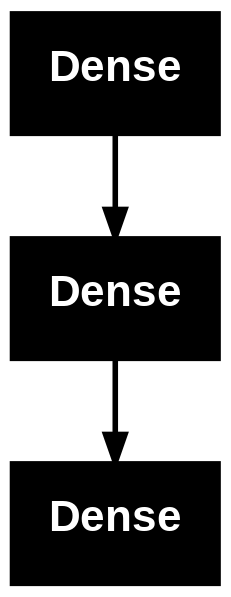

In [12]:
tf.keras.utils.plot_model(model)

모델을 이용한 예측

In [13]:
xtrain[0]

array([-0.01277963, -0.04464164,  0.06061839,  0.05285804,  0.04796534,
        0.02937467, -0.01762938,  0.03430886,  0.07020738,  0.00720652])

In [14]:
model.predict(xtrain[[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


array([[0.09500834, 0.9049916 ]], dtype=float32)

모델 평가

In [15]:
model.evaluate(xtrain,ytrain)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7348 - loss: 0.5044


[0.5111603140830994, 0.7283018827438354]

In [16]:
model.evaluate(xtest,ytest)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.7798 - loss: 0.4495


[0.4367396831512451, 0.7966101765632629]

# 연습문제

1. 딥러닝 모델에서 첫 번째 Dense 계층(노드 수 10)와 두 번째 Dense 계층 (노드 수 5) 사이에 계층 정규화 (Layer Normalization), 두 번째 Dense 계층와 세 번째 Dense 계층 사이에 배치 정규화 (Batch Normalization)를 추가하시오. 정규화는

```
 tf.keras.layers.LayerNormalization()
 tf.keras.layers.BatchNormalization()
```
를 추가하여 구현할 수 있다. <br>
이 모델을 에폭 1,000번 반복하여 훈련하였을 때, 훈련데이터와 평가데이터의 성능은 어떻게 나타나는가? 이 모델의 학습 가능한 파라메터의 수는 모두 몇 개인가? 계층 정규화에서 추가된 파라메터는 몇 개인가? 그 이유를 설명하시오.


* 메모리가 부족한 문제가 발생할 경우, fit의 verbose를 0 또는 2로 조정하시오. (기본은 1)

In [17]:
import tensorflow as tf

# 인공신경망 모델
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Input(shape=(10,)) )  # 입력 변수의 수: 10
model.add( tf.keras.layers.Dense(10,activation='sigmoid') )
model.add( tf.keras.layers.LayerNormalization() )
model.add( tf.keras.layers.Dense(5,activation='sigmoid') )
model.add( tf.keras.layers.BatchNormalization() )
model.add( tf.keras.layers.Dense(2,activation='softmax') )

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(xtrain,ytrain,epochs=1000,verbose=2)

Epoch 1/1000
9/9 - 3s - 378ms/step - accuracy: 0.5962 - loss: 0.8152
Epoch 2/1000
9/9 - 0s - 6ms/step - accuracy: 0.6113 - loss: 0.7464
Epoch 3/1000
9/9 - 0s - 6ms/step - accuracy: 0.6377 - loss: 0.6756
Epoch 4/1000
9/9 - 0s - 7ms/step - accuracy: 0.6906 - loss: 0.6583
Epoch 5/1000
9/9 - 0s - 6ms/step - accuracy: 0.6830 - loss: 0.6396
Epoch 6/1000
9/9 - 0s - 7ms/step - accuracy: 0.7019 - loss: 0.6118
Epoch 7/1000
9/9 - 0s - 6ms/step - accuracy: 0.6981 - loss: 0.5827
Epoch 8/1000
9/9 - 0s - 6ms/step - accuracy: 0.7170 - loss: 0.5951
Epoch 9/1000
9/9 - 0s - 6ms/step - accuracy: 0.7170 - loss: 0.5793
Epoch 10/1000
9/9 - 0s - 7ms/step - accuracy: 0.7208 - loss: 0.5735
Epoch 11/1000
9/9 - 0s - 6ms/step - accuracy: 0.7321 - loss: 0.5574
Epoch 12/1000
9/9 - 0s - 6ms/step - accuracy: 0.7245 - loss: 0.5678
Epoch 13/1000
9/9 - 0s - 6ms/step - accuracy: 0.7396 - loss: 0.5425
Epoch 14/1000
9/9 - 0s - 7ms/step - accuracy: 0.7132 - loss: 0.5502
Epoch 15/1000
9/9 - 0s - 6ms/step - accuracy: 0.7434 - 

In [20]:
# 계층정규화, 배치정규화 계층에서 각각 20개, 10개의 파라메터가 추가되어 총 207개의 파라메터가 존재.
# 정규화는 입력 변수 하나에 대하여 각각의 평균과 분산을 학습하기 때문에 10개, 5개의 입력에 대해서는 총 20 + 10개의 추가 파라메터가 필요함.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 10)             │            20 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 633 (2.48 KB)

 Trainable params: 207 (828.00 B)

 Non-trainable params: 10 (40.00 B)

 Optimizer params: 416 (1.63 KB)

In [21]:
model.evaluate(xtrain,ytrain)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7947 - loss: 0.4065


[0.4068911075592041, 0.800000011920929]

In [22]:
model.evaluate(xtest,ytest)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7785 - loss: 0.5065


[0.5831195116043091, 0.7514124512672424]

2. 아래와 같이 MNIST 데이터셋을 읽어, 숫자를 판별하는 인공신경망 모델을 텐서플로우를 이용하여 만들고 성능을 평가하시오. 모델의 구조는 자유롭게 결정하고 필요하다면 추가적인 정규화나 규제화 기법을 사용하시오. 단, 최종 출력층의 활성화 함수는 softmax함수를 이용하시오.

In [23]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33,random_state=1)

In [24]:
for i in range(10):
  print(f'{i} count : {np.sum(y==i)}')

0 count : 178
1 count : 182
2 count : 177
3 count : 183
4 count : 181
5 count : 182
6 count : 181
7 count : 179
8 count : 174
9 count : 180


In [25]:
np.sum(y==3)

np.int64(183)

In [26]:
# 인공신경망 모델
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Input(shape=(64,)) )
model.add( tf.keras.layers.Dense(128,activation='relu'))
model.add( tf.keras.layers.Dense(64, activation='leaky_relu'))
model.add( tf.keras.layers.LayerNormalization() )
model.add( tf.keras.layers.Dropout(0.3))
model.add( tf.keras.layers.Dense(10, activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [27]:
model.fit(xtrain,ytrain, validation_split=0.2, epochs=100,verbose=2)

Epoch 1/100
31/31 - 6s - 179ms/step - accuracy: 0.1164 - loss: 2.9807 - val_accuracy: 0.1909 - val_loss: 2.2843
Epoch 2/100
31/31 - 0s - 8ms/step - accuracy: 0.1601 - loss: 2.5460 - val_accuracy: 0.3444 - val_loss: 1.9965
Epoch 3/100
31/31 - 0s - 11ms/step - accuracy: 0.2204 - loss: 2.1962 - val_accuracy: 0.4647 - val_loss: 1.7512
Epoch 4/100
31/31 - 0s - 9ms/step - accuracy: 0.3108 - loss: 1.9727 - val_accuracy: 0.5768 - val_loss: 1.5395
Epoch 5/100
31/31 - 0s - 8ms/step - accuracy: 0.3888 - loss: 1.7474 - val_accuracy: 0.6556 - val_loss: 1.3555
Epoch 6/100
31/31 - 0s - 5ms/step - accuracy: 0.4823 - loss: 1.5363 - val_accuracy: 0.7303 - val_loss: 1.1762
Epoch 7/100
31/31 - 0s - 11ms/step - accuracy: 0.5374 - loss: 1.3660 - val_accuracy: 0.7925 - val_loss: 1.0207
Epoch 8/100
31/31 - 0s - 5ms/step - accuracy: 0.6424 - loss: 1.1729 - val_accuracy: 0.8423 - val_loss: 0.8755
Epoch 9/100
31/31 - 0s - 5ms/step - accuracy: 0.6632 - loss: 1.0567 - val_accuracy: 0.8631 - val_loss: 0.7647
Epoch 

In [28]:
model.evaluate(xtrain,ytrain)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9973 - loss: 0.0295


[0.04804271087050438, 0.9883624315261841]

In [29]:
model.evaluate(xtest,ytest)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9831 - loss: 0.0750


[0.09137900173664093, 0.9747474789619446]

In [30]:
X.shape, xtest.shape

((1797, 64), (594, 64))

In [31]:
ypred = model.predict(xtest)
print(f'평가 데이터 출력의 총 합 : {np.sum(ypred):.0f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
평가 데이터 출력의 총 합 : 594
